## B0744144 左庭瑀 0505 Midterm

## Question 1

In [33]:
import thinkdsp as td
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd

In [6]:
class Trombone(td.Chirp):
    def evaluate(self, ts):
        l1, l2=  1.0/self.start, 1.0/self.end
        lengths= np.linspace(l1, l2, len(ts)-1)
        freqs=   1/lengths
        return self._evaluate(ts, freqs)

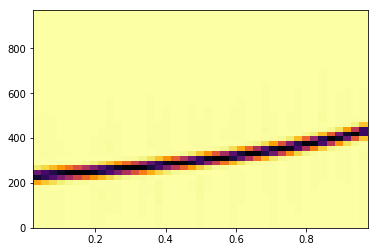

In [7]:
A3=  220 
E3=  330
A4=  440

s1= Trombone(start= A3, end= A4)
w1= s1.make_wave(duration=1)
w1.make_spectrogram(512).plot(high=1000)
w1.make_audio()

In [8]:
s2= Trombone(start= A4, end= E3)
w2= s2.make_wave(duration=1)
w2.make_audio()

In [41]:
s2= Trombone(start= A4, end= E3)
w2= s2.make_wave(duration=1)
w2.make_audio()

In [42]:
w3= w1|w2
w3.make_audio()

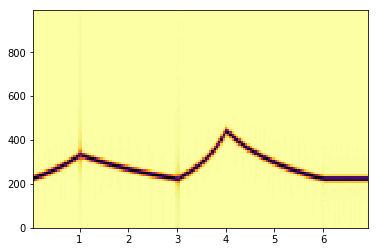

In [43]:
w= (
 Trombone(A3,E3).make_wave(1)
|Trombone(E3,A3).make_wave(2)
|Trombone(A3,A4).make_wave(1)
|Trombone(A4,A3).make_wave(2)
|Trombone(A3,A3).make_wave(1)
)
w.make_spectrogram(1024).plot(high=1000)
w.make_audio()

In [45]:
r= 2**(1/12)

[A,A1,B,C,C1,D,D1,E,F,F1,G,G1,a]= \
[440*r**i for i in range(12+1)]
song= [A,A,E,E,F1,F1,E,E]

s= Trombone(song[0],song[1]).make_wave(.5)
for x in song[1:]:
    s= (s|Trombone(x,x).make_wave(.5))

In [46]:
s.make_audio()

## Question 2

In [57]:
x= td.UncorrelatedGaussianNoise()
x= x.make_wave(duration= 1, framerate= 10000)
x.ys.shape

(10000,)

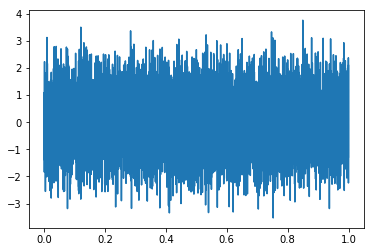

In [58]:
pl.plot(x.ts, x.ys)

In [59]:
x.ys.max(), x.ys.mean(), x.ys.std()

(3.7618321047130787, -0.009181843319910793, 1.0050187080815858)

In [60]:
sx= x.make_spectrum()
sx.hs.shape

(5001,)

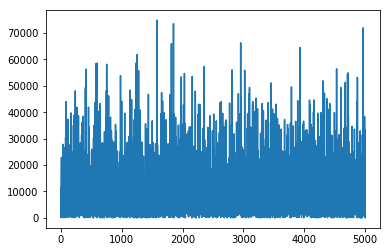

In [61]:
sx.plot_power()

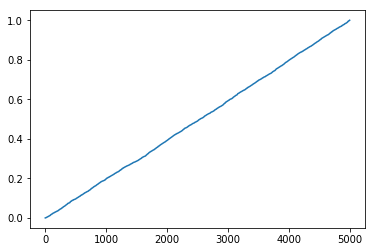

In [62]:
Sx= sx.make_integrated_spectrum()
Sx.plot_power()

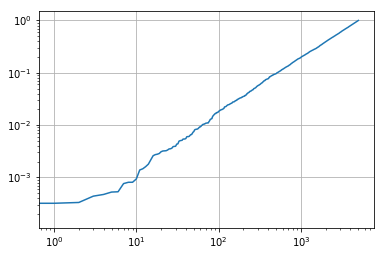

In [63]:
Sx.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [72]:
Sx.estimate_slope()

ValueError: Inputs must not be empty.

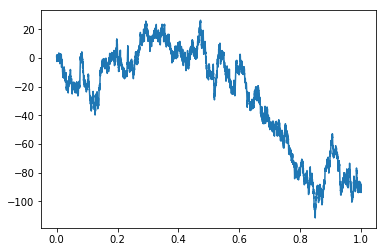

In [66]:
y= x.cumsum()
y.plot()

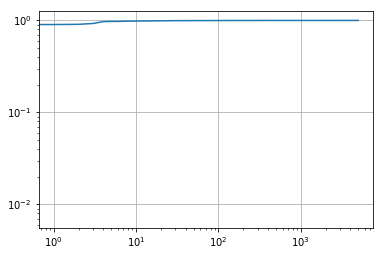

In [67]:
sy.make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [68]:
sy.make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.

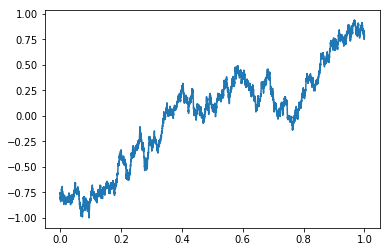

In [69]:
z= td.BrownianNoise().make_wave(duration=1, framerate=10000)
sz= x.make_spectrum()
z.plot()

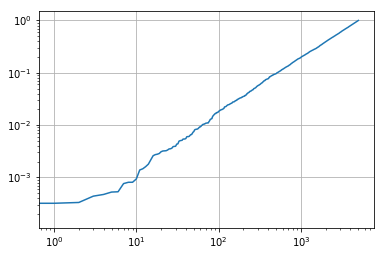

In [70]:
sz.make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [71]:
z.make_spectrum().make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.

10.  z的值近似於y

## Question 3

In [36]:
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
df= pd.read_csv(aUrl)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
5,1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0
6,1928-01-10,17.370001,17.370001,17.370001,17.370001,17.370001,0
7,1928-01-11,17.350000,17.350000,17.350000,17.350000,17.350000,0
8,1928-01-12,17.469999,17.469999,17.469999,17.469999,17.469999,0
9,1928-01-13,17.580000,17.580000,17.580000,17.580000,17.580000,0


列數 =23193 ， 行數=7行

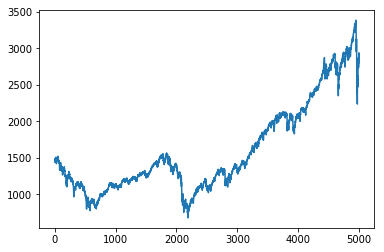

In [37]:
ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

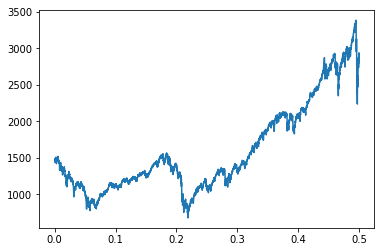

In [38]:
yWave= td.Wave(ys, framerate= 10000)
yWave.plot()

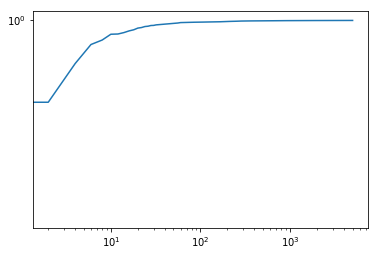

In [39]:
yWave.make_spectrum().make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')

In [40]:
yWave.make_spectrum().make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.

4.
integrated_spectrum 之 log-log slope= .0003 近似於 0，
因此 yWave 近似Brownian Noise

謝謝老師和助教。